In [408]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt
import gensim
from gensim import corpora, models, similarities, downloader
from gensim.models.word2vec import Text8Corpus
from gensim.models.phrases import Phrases
from gensim.test.utils import datapath
from collections import defaultdict
import os
import tempfile
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import pickle
from collections import Counter, OrderedDict
import os

In [435]:
os.chdir('./capstone2/')

In [445]:
os.getcwd()

'/Users/hyorimlee/Desktop/gNYC13/capstone2'

In [437]:
!pwd

/Users/hyorimlee/Desktop/gNYC13/capstone2


In [296]:
df = pd.read_csv('../data/fashion_tweets.csv')

In [297]:
df = df.drop(columns = ['Unnamed: 0'])

In [298]:
df['text']

0                                     b'704 Sweaters on sale now\n.\nhttps://t.co/NiaRwIIYzy\n.\n#fashion #style #love #instagood #like #photography\xe2\x80\xa6 https://t.co/gsstXSh3Cn'
1                           b"d'Lentilse is offering FREE shipping on all orders, Refunds &amp; Return policy and Buyer protection guarantees to our\xe2\x80\xa6 https://t.co/GD457k7l26"
2                              b'RT @SunnyJenni2019: Purple Tie dye shirt for women Small,Unique Christmas Gift https://t.co/30fQhirww8 via @Etsy #SmallBusinesses #mondayth\xe2\x80\xa6'
3                                        b"You know you're in love when you can't fall asleep because reality is ultimately better than your dreams.\xe2\x80\xa6 https://t.co/e7Obxhl0bN"
4        b'BLACK FRIDAY CYBER MONDAY SALE!!! Use code \xe2\x80\x9cBFCM2020\xe2\x80\x9d for 25% off your order!!! Tecabu Black Hoodie is a perfect gi\xe2\x80\xa6 https://t.co/KVFORiZtIk'
                                                                      

In [299]:
dk_corpus = [[i] for i in df['text']]

In [300]:
dk_corpus

[["b'704 Sweaters on sale now\\n.\\nhttps://t.co/NiaRwIIYzy\\n.\\n#fashion #style #love #instagood #like #photography\\xe2\\x80\\xa6 https://t.co/gsstXSh3Cn'"],
 ['b"d\'Lentilse is offering FREE shipping on all orders, Refunds &amp; Return policy and Buyer protection guarantees to our\\xe2\\x80\\xa6 https://t.co/GD457k7l26"'],
 ["b'RT @SunnyJenni2019: Purple Tie dye shirt for women Small,Unique Christmas Gift https://t.co/30fQhirww8 via @Etsy #SmallBusinesses #mondayth\\xe2\\x80\\xa6'"],
 ['b"You know you\'re in love when you can\'t fall asleep because reality is ultimately better than your dreams.\\xe2\\x80\\xa6 https://t.co/e7Obxhl0bN"'],
 ["b'BLACK FRIDAY CYBER MONDAY SALE!!! Use code \\xe2\\x80\\x9cBFCM2020\\xe2\\x80\\x9d for 25% off your order!!! Tecabu Black Hoodie is a perfect gi\\xe2\\x80\\xa6 https://t.co/KVFORiZtIk'"],
 ["b'RT @SunnyJenni2019: Purple Tie dye shirt for women Small,Unique Christmas Gift https://t.co/30fQhirww8 via @Etsy #SmallBusinesses #mondayth\\xe2\\x80\\xa6

In [301]:
words = [i for i in df['text']]

In [302]:
lst = []
for document in df['text']:
    lst.append(document)

In [303]:
tokens = [sent for sent in map(word_tokenize, lst)]

In [304]:
tokens_lower = [[word.lower() for word in sent] for sent in tokens]

In [305]:
stopwords_ = set(stopwords.words('english'))
stopwords_ = {'a', 'n','co','nto','amp','rt','regatta'
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 're',
 's',
 'same',
 'shan',
 "shan't",
 'she',
 "she's",
 'should',
 "should've",
 'shouldn',
 "shouldn't",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'to',
 'too',
 'under',
 'until',
 'up',
 've',
 'very',
 'was',
 'wasn',
 "wasn't",
 'we',
 'were',
 'weren',
 "weren't",
 'what',
 'when',
 'where',
 'which',
 'while',
 'who',
 'whom',
 'why',
 'will',
 'with',
 'won',
 "won't",
 'wouldn',
 "wouldn't",
 'y',
 'you',
 "you'd",
 "you'll",
 "you're",
 "you've",
 'your',
 'yours',
 'yourself',
 'yourselves'}

In [306]:
punctuation_ = set(string.punctuation)


In [307]:
def filter_tokens(sent):
    return([w for w in sent if not w in stopwords_ and not w in punctuation_ ])

In [308]:
tokens_filtered = list(map(filter_tokens, tokens_lower))

In [309]:
for sent in tokens_filtered:
    print("--- sentence tokens: {}".format(sent))

--- sentence tokens: ["b'704", 'sweaters', 'sale', 'now\\n.\\nhttps', '//t.co/niarwiiyzy\\n.\\n', 'fashion', 'style', 'love', 'instagood', 'like', 'photography\\xe2\\x80\\xa6', 'https', '//t.co/gsstxsh3cn']
--- sentence tokens: ['b', "''", "d'lentilse", 'offering', 'free', 'shipping', 'orders', 'refunds', 'return', 'policy', 'buyer', 'protection', 'guarantees', 'our\\xe2\\x80\\xa6', 'https', '//t.co/gd457k7l26', "''"]
--- sentence tokens: ["b'rt", 'sunnyjenni2019', 'purple', 'tie', 'dye', 'shirt', 'women', 'small', 'unique', 'christmas', 'gift', 'https', '//t.co/30fqhirww8', 'via', 'etsy', 'smallbusinesses', 'mondayth\\xe2\\x80\\xa6']
--- sentence tokens: ['b', "''", 'know', "'re", 'love', 'ca', "n't", 'fall', 'asleep', 'reality', 'ultimately', 'better', 'dreams.\\xe2\\x80\\xa6', 'https', '//t.co/e7obxhl0bn', "''"]
--- sentence tokens: ["b'black", 'friday', 'cyber', 'monday', 'sale', 'use', 'code', '\\xe2\\x80\\x9cbfcm2020\\xe2\\x80\\x9d', '25', 'order', 'tecabu', 'black', 'hoodie', 'p

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [310]:
stemmer_porter = PorterStemmer()
tokens_stemporter = [list(map(stemmer_porter.stem, sent)) for sent in tokens_filtered]
print("--- sentence tokens (porter): {}".format(tokens_stemporter[0]))

--- sentence tokens (porter): ["b'704", 'sweater', 'sale', 'now\\n.\\nhttp', '//t.co/niarwiiyzy\\n.\\n', 'fashion', 'style', 'love', 'instagood', 'like', 'photography\\xe2\\x80\\xa6', 'http', '//t.co/gsstxsh3cn']


In [311]:
def preprocess(raw_text):
    stopwords_set = set(stopwords.words('english'))
    #Remove punctuations and stopwords
    cleaned = " ".join([i for i in re.sub(r'[^\w\s]', " ", raw_text).lower().split() if i not in stopwords_set])
    #Remove prefixed 'b'
    cleaned = re.sub(r'^b\s+', "", cleaned)
    #Remove retweet 'rt'
    cleaned = re.sub(r'^rt\s+', "", cleaned)
    # Remove single characters from the start
    cleaned = re.sub(r'\^[a-zA-Z]\s+', ' ', cleaned) 
    # Remove single characters
    cleaned = re.sub(r'\s+[a-zA-Z]\s+', ' ', cleaned)
    # Remove _ characters from the start
    cleaned = re.sub('\w*\_\w*', ' ', cleaned)
    #Remove URLs
    cleaned = re.sub(r'http\S+', "", cleaned) 
    # Remove words with containing numbers
    cleaned = re.sub('\w*\d\w*', '', cleaned)
    # Substituting multiple spaces with single space
    cleaned= re.sub(r'\s+', ' ', cleaned, flags=re.I)
    # Remove ome random letters

    return cleaned

In [312]:
df_clean = pd.DataFrame(df.text.apply(preprocess))

In [313]:
df['text'] = df_clean

In [314]:
df[df.username == 'FrenchieMummy'].text.iloc[1]

' christmas n win regatta great outdoors coat worth choose jacket nto enter rt amp foll co tjwayskhjz'

In [315]:
one_string = " ".join(df.text)

In [316]:
wordcloud = WordCloud(background_color ='white',stopwords=['n','co','nto','amp','rt','regatta']).generate(one_string)

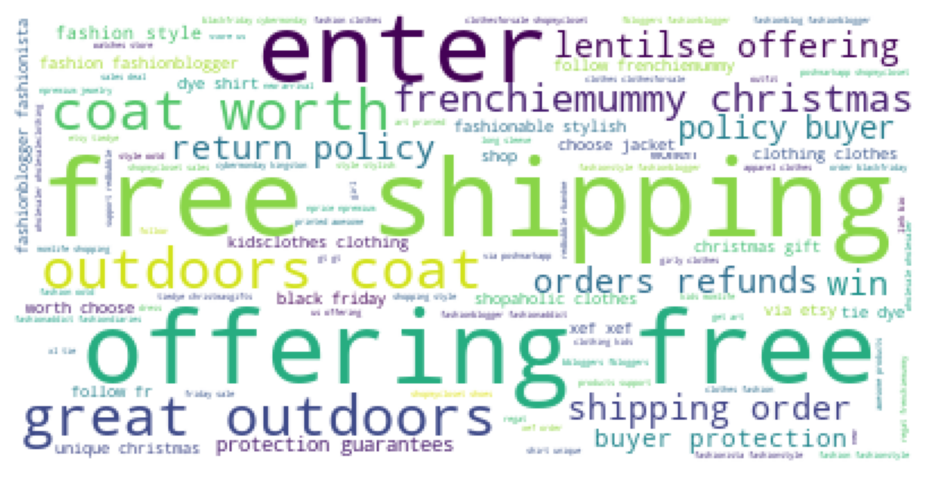

In [317]:
ax, fig = plt.subplots(figsize = (10, 5), dpi=120) 
fig.imshow(wordcloud) 
fig.axis("off") 
plt.savefig('../img/first_cloud.jpg')

In [318]:
documents = list(df_clean.text)

In [319]:
texts = [
    [word for word in document.lower().split() if word not in stopwords_]
    for document in documents
]

In [320]:
len(texts)

19408

In [321]:
# remove words that appear only once
frequency = defaultdict(int)
for text in texts:
    for token in text:
        frequency[token] += 1

In [322]:
texts = [
    [token for token in text if frequency[token] > 1]
    for text in texts
]

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [323]:
texts

[['sweaters',
  'sale',
  'niarwiiyzy',
  'fashion',
  'style',
  'love',
  'instagood',
  'like',
  'photography'],
 ['lentilse',
  'offering',
  'free',
  'shipping',
  'orders',
  'refunds',
  'return',
  'policy',
  'buyer',
  'protection',
  'guarantees'],
 ['purple',
  'tie',
  'dye',
  'shirt',
  'women',
  'small',
  'unique',
  'christmas',
  'gift',
  'via',
  'etsy',
  'smallbusinesses',
  'mondayth'],
 ['know',
  'love',
  'fall',
  'asleep',
  'reality',
  'ultimately',
  'better',
  'dreams'],
 ['black',
  'friday',
  'cyber',
  'monday',
  'sale',
  'use',
  'code',
  'order',
  'tecabu',
  'black',
  'hoodie',
  'perfect',
  'gi',
  'kvforiztik'],
 ['purple',
  'tie',
  'dye',
  'shirt',
  'women',
  'small',
  'unique',
  'christmas',
  'gift',
  'via',
  'etsy',
  'smallbusinesses',
  'mondayth'],
 ['boulevard',
  'coub',
  'fashionmusicbook',
  'fashion',
  'fashionstyle',
  'fashionblogger',
  'fashionista',
  'fashionfriday',
  'ht'],
 ['make',
  'someone',
  'day'

In [324]:
vectorizer = TfidfVectorizer(min_df=3,  max_features=1500, max_df = .7,
            strip_accents='unicode', analyzer='word', ngram_range = (1,2),
            use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = stopwords_)
X = vectorizer.fit_transform(df.text)
words = vectorizer.get_feature_names()

In [325]:
dtm = pd.DataFrame(X.toarray(), columns=words)

In [326]:
vocab = np.array(vectorizer.get_feature_names())

In [327]:
vocab

array(['accessories', 'accessory', 'adameve', ..., 'yet', 'youtube',
       'zipper'], dtype='<U34')

In [328]:
nmf = NMF(n_components=5, max_iter=2000, alpha=0.0)
W = nmf.fit_transform(X)
H = nmf.components_
print('reconstruction error:', nmf.reconstruction_err_)

reconstruction error: 130.5689097563424


In [329]:
def label_topics(H, vocabulary):
    labels = []
    for i, row in enumerate(H):
        top_five = np.argsort(row)[::-1][:30]
        print('topic', i)
        print('-->', ' '.join(vocabulary[top_five]))
        label = input('\n' + 'topic guess')
        labels.append(label)
        print()
    return labels

In [330]:
topic_labels = label_topics(H, vocab)

topic 0
--> shipping orders orders buyer protection guarantees lentilse lentilse offering orders refunds buyer protection policy policy buyer guarantees return policy refunds refunds return return protection free shipping offering free offering shipping free dlentilse lentilse guarantees customers dlentilse customers npremium jewelry store us watches store nprice npremium npremium



topic guess customer_service



topic 1
--> frenchiemummy regatta great coat worth win regatta christmas win outdoors coat regatta great outdoors outdoors worth enter win enter follow frenchiemummy christmas great follow coat christmas jacket enter choose jacket worth choose choose jacket worth enter follow frenchiemummy regat frenchiemummy regat follow fr fr instagram



topic guess frenchiemummy



topic 2
--> fashion fashionblogger style clothes fashion fashionblogger fashion style fashionista ootd fashionstyle xef clothing fashionblogger fashionista new shop love women dress sale shopping fashionblog black winter shopaholic shopaholic clothes check outfit clothes fashion fbloggers friday instafashion



topic guess bloggers



topic 3
--> gift tie via etsy via etsy shirt dye tie dye dye shirt christmas gift unique unique christmas gift via tiedye christmasgifts etsy tiedye tiedye christmasgifts xl tie shirt unique xl christmas christmasgifts sundayvibes sundayvibes sundayvibes quarenti quarenti uniquegifts christmasgifts mondaymotivaton mondaymotivaton mondaymotivaton gift thanksgivingday



topic guess quirky



topic 4
--> fashionable stylish fashionable stylish women men leather stylish women bag set casual printed fashionable design stylish fashion design style stylish cotton silver fashionblog car kidsclothes backpack clothing kids momlife kids high shopping style kids momlife momlife shopping ring kidsclothes clothing



topic guess shopping


In [331]:
topic = pd.DataFrame(W, columns = topic_labels)
topic['topic_guess'] = topic.idxmax(axis=1)

In [332]:
counter = dict(Counter(topic.topic_guess))
for k, v, in counter.items():
    counter[k] = (v/19408)*100

In [333]:
counter

{'bloggers': 70.24938169826875,
 'customer_service': 6.291220115416323,
 'quirky': 7.213520197856554,
 'frenchiemummy': 5.374072547403133,
 'shopping': 10.871805441055235}

In [334]:
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

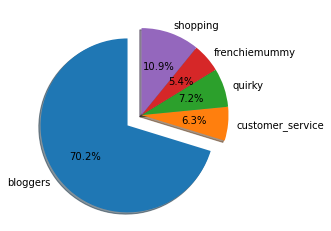

In [444]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.pie([float(v) for v in counter.values()], labels=[k for k in counter], autopct = '%1.1f%%', shadow=True, 
       explode=(.2, 0, 0, 0, 0), startangle=90)
plt.show()
fig.savefig('./img/pie.jpg')

In [336]:
W.shape

(19408, 5)

In [337]:
topic = pd.DataFrame(W, columns = topic_labels)
topic['topic_guess'] = topic.idxmax(axis=1)
topic.head()

,customer_service,frenchiemummy,bloggers,quirky,shopping,topic_guess
0,0.000000,0.000000,0.052842,0.000000,0.000000,bloggers
1,0.191108,0.000000,0.000000,0.000000,0.000000,customer_service
2,0.000000,0.001137,0.000000,0.157402,0.004368,quirky
3,0.000000,0.000000,0.010884,0.000000,0.000051,bloggers
4,0.000082,0.000000,0.021164,0.000518,0.000000,bloggers


In [338]:
topic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19408 entries, 0 to 19407
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_service  19408 non-null  float64
 1   frenchiemummy     19408 non-null  float64
 2   bloggers          19408 non-null  float64
 3   quirky            19408 non-null  float64
 4   shopping          19408 non-null  float64
 5   topic_guess       19408 non-null  object 
dtypes: float64(5), object(1)
memory usage: 909.9+ KB


In [339]:
counter = dict(Counter(topic.topic_guess))
for k, v, in counter.items():
    counter[k] = (v/19408)*100
sorted_counter = sorted(counter.items(), key=lambda x: (-x[1], x[0]))

In [340]:
sorted_counter

[('bloggers', 70.24938169826875),
 ('shopping', 10.871805441055235),
 ('quirky', 7.213520197856554),
 ('customer_service', 6.291220115416323),
 ('frenchiemummy', 5.374072547403133)]

In [341]:
columns_= ["bloggers","shopping","quirky","customer_service","frenchiemummy"]

In [342]:
new_df = topic[topic.topic_guess.isin(columns_)]

In [343]:
new_df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            19398, 19399, 19400, 19401, 19402, 19403, 19404, 19405, 19406,
            19407],
           dtype='int64', length=19408)

In [344]:
new_df.shape

(19408, 6)

In [345]:
indexes_22 = topic[topic.topic_guess == "bloggers"].index
topic_1 = df.loc[df.index.isin(indexes_22)]
pd.set_option("display.max_colwidth", None)
topic_1

,created,text,username,location,follower count,friend count,user timezone,retweet,source
0,2020-11-30 19:08:10,sweaters sale n co niarwiiyzy n fashion style love instagood like photography co,neighborhood704,"Charlotte, NC",1142,1191,NaN,0,Twitter for iPhone
3,2020-11-30 18:56:25,know love fall asleep reality ultimately better dreams co,NinaWoss,NaN,82,94,NaN,0,Twitter for Android
4,2020-11-30 18:53:33,black friday cyber monday sale use code order tecabu black hoodie perfect gi co kvforiztik,TecabuBrand,NaN,29,1,NaN,0,Twitter for iPhone
6,2020-11-30 18:51:43,boulevard coub co fashionmusicbook fashion fashionstyle fashionblogger fashionista fashionfriday ht,bugsbunny111111,NaN,4,864,NaN,70,Twitter Web App
7,2020-11-30 18:47:30,make someone day get something love top quality women clothing accessories co nxvho,weareyandi,NaN,175,0,NaN,1,Yandi.com
...,...,...,...,...,...,...,...,...,...
19403,2020-11-22 14:10:11,fashiondiaries lichip smartwatch heart rate monitor unisex co,AdisseShop,"Doha, Qatar",86,71,NaN,0,SocialRabbit Plugin
19404,2020-11-22 12:18:36,adamevefamily bring video sneak peek creating guess fastfashion rethink reimagine adameve fashion,_DirtyFashion_,"London, England",1625,280,NaN,2,Dirty Fashion retweet
19405,2020-11-22 12:18:31,adamevefamily bring video sneak peek creating guess fastfashion rethink reimagine adameve fashion,_DirtyFashion_,"London, England",1625,280,NaN,3,Dirty Fashion retweet
19406,2020-11-22 12:02:35,chic sweater dresses saks love bbloggers fbloggers fashionblogger fashionaddict fashiondiaries co,efashionallure,NaN,13511,13168,NaN,0,Share FA posts via Revive


In [346]:
topic_1 = topic_1.sort_values(by=['follower count'], ascending=False)

In [347]:
# Number of bloggers
len(topic_1.username.unique())

2941

In [351]:
unique_bloggers = topic_1.drop_duplicates(subset="username", keep='first')

In [365]:
top_10 = unique_bloggers.head(10)

In [366]:
top_10_account = list(top_10.username)

In [367]:
top_10_followers = list(top_10['follower count'])

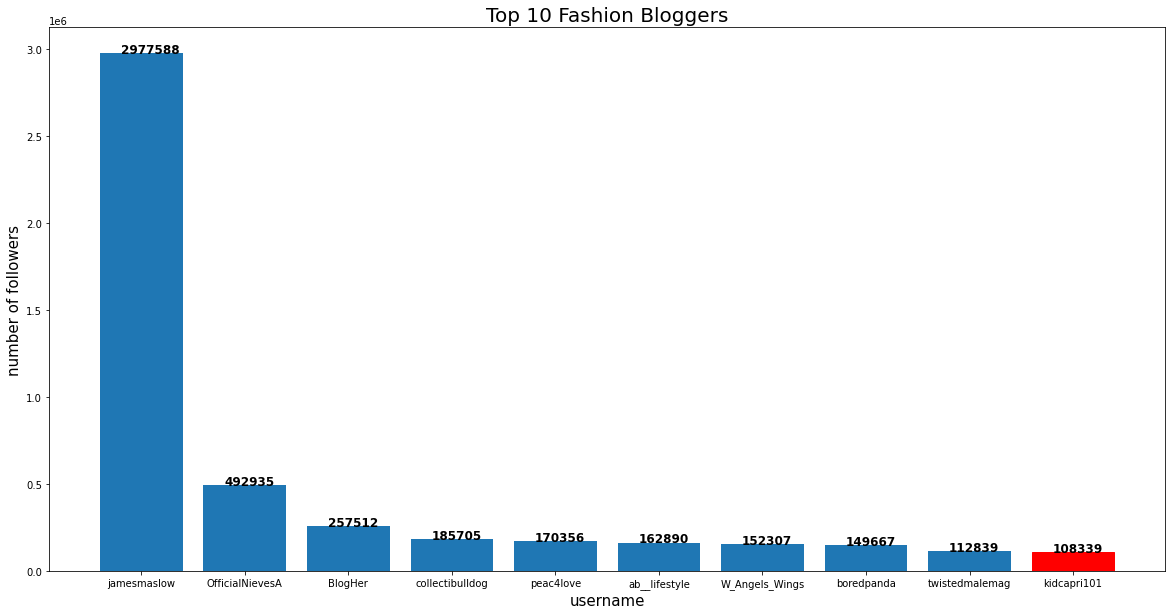

In [453]:
fig,ax = plt.subplots(figsize=(20,10))
ax.bar(top_10_account, top_10_followers)[9].set_color('r')
for i,v in enumerate(top_10_followers):
#     ax.text( i-0.2 , (v + 3)**(1/6), str(v), color='Black', fontweight='bold')
    ax.text( i-0.2 , (v + 3), str(v), color='Black', fontweight='bold', fontsize = 12)
plt.xlabel('username', fontsize=15)
plt.ylabel('number of followers', fontsize=15)
ax.set_title("Top 10 Fashion Bloggers", fontsize= 20)
plt.savefig('./img/followers')

In [349]:
doc_lens = [len(d) for d in texts]

Text(0.5, 1.0, 'Distribution of Document Word Counts')

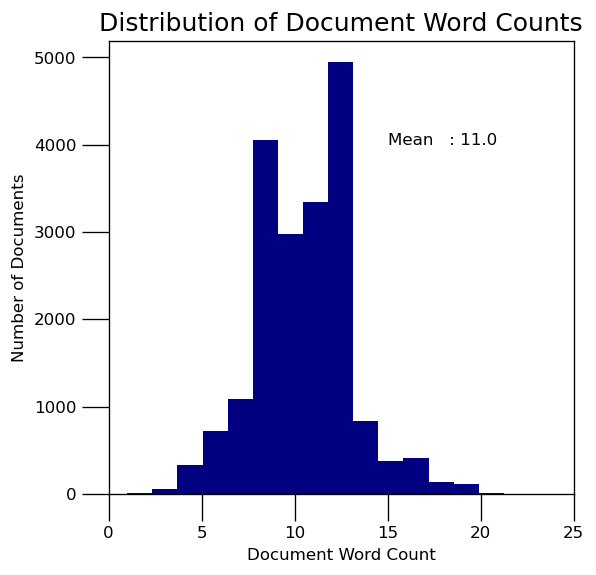

In [407]:
plt.figure(figsize=(5,5), dpi= 120)
plt.hist(doc_lens, bins = 20, color='navy')
plt.text(15, 4000, "Mean   : " + str(round(np.mean(doc_lens))))
# plt.text(15, 4500, "Median : " + str(round(np.median(doc_lens))))
# plt.text(15, 4000, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(15, 3500, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(15, 3000, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 20), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,25,6))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=15))


In [402]:
!pwd

/Users/hyorimlee/.Trash/src


In [404]:
!cd ~


/Users/hyorimlee/.Trash/src


In [51]:
tfidf = models.TfidfModel(corpus)  # step 1 -- initialize a model

In [34]:
doc_bow = [(0, 1), (1, 1)]
print(tfidf[doc_bow])  # step 2 -- use the model to transform vectors

[(0, 0.29661390157541173), (1, 0.9549974834481042)]


In [35]:
corpus_tfidf = tfidf[corpus]

In [36]:
len (corpus)

19408

In [37]:
lsi_model = models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=5)  # initialize an LSI transformation
corpus_lsi = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [38]:
lsi_model.print_topics()

[(0,
  '-0.428*"frenchiemummy" + -0.293*"regatta" + -0.293*"outdoors" + -0.291*"worth" + -0.290*"enter" + -0.290*"win" + -0.280*"great" + -0.272*"coat" + -0.272*"follow" + -0.251*"christmas"'),
 (1,
  '0.309*"buyer" + 0.309*"refunds" + 0.309*"policy" + 0.309*"lentilse" + 0.309*"guarantees" + 0.308*"return" + 0.308*"protection" + 0.306*"orders" + 0.294*"offering" + 0.280*"shipping"'),
 (2,
  '-0.364*"gift" + -0.316*"tie" + -0.306*"etsy" + -0.288*"dye" + -0.284*"via" + -0.284*"shirt" + -0.273*"unique" + -0.264*"tiedye" + -0.256*"christmasgifts" + -0.255*"xl"'),
 (3,
  '0.251*"fashion" + 0.225*"style" + 0.221*"clothes" + 0.212*"clothing" + 0.209*"fashionblogger" + 0.190*"shopping" + 0.184*"kidsclothes" + 0.174*"xef" + 0.150*"fashionista" + 0.144*"stylish"'),
 (4,
  '0.297*"xef" + 0.260*"cybermonday" + 0.252*"fashionista" + -0.250*"kidsclothes" + 0.238*"fashionstyle" + -0.234*"clothing" + 0.208*"kingston" + 0.196*"blackfriday" + 0.192*"order" + -0.175*"shopmycloset"')]

In [39]:
lsi_model.get_topics().shape

(5, 11975)

In [40]:
lsi_model.get_topics()

array([[-1.71379758e-03, -4.03204417e-04, -6.03871914e-04, ...,
        -9.71762619e-07, -7.96507826e-07, -7.92482393e-07],
       [ 7.40181154e-04,  3.15980423e-04,  4.52938745e-04, ...,
         4.35142247e-06,  6.07152958e-07,  4.94938819e-07],
       [-4.29823363e-02, -3.12750289e-03, -5.96749928e-03, ...,
        -6.44389058e-05, -2.61634589e-05, -2.55341837e-05],
       [ 2.50713234e-01,  2.32751336e-02,  2.65239517e-02, ...,
         3.63373023e-04,  4.49233909e-05,  4.92681535e-05],
       [ 9.42535138e-02,  2.39293434e-04,  5.05797017e-03, ...,
        -3.04281171e-05,  9.99821817e-06,  4.31416251e-06]])

In [41]:
with tempfile.NamedTemporaryFile(prefix='model-', suffix='.lsi', delete=False) as tmp:
    lsi_model.save(tmp.name)  # same for tfidf, lda, ...

loaded_lsi_model = models.LsiModel.load(tmp.name)

os.unlink(tmp.name)

In [42]:
lda_model = models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=2)  # initialize an LSI transformation
corpus_lda = lsi_model[corpus_tfidf]  # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [43]:
lda_model.print_topics()

[(0,
  '0.013*"frenchiemummy" + 0.010*"christmas" + 0.010*"win" + 0.009*"coat" + 0.009*"great" + 0.009*"enter" + 0.009*"worth" + 0.009*"regatta" + 0.009*"outdoors" + 0.008*"follow"'),
 (1,
  '0.010*"fashionable" + 0.008*"fashion" + 0.007*"stylish" + 0.006*"clothes" + 0.005*"women" + 0.005*"style" + 0.005*"xef" + 0.004*"fashionblogger" + 0.004*"winter" + 0.003*"new"')]

In [44]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

In [45]:
cloud = WordCloud(stopwords=stopwords_,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

In [46]:
topics = lsi_model.show_topics(formatted=False)

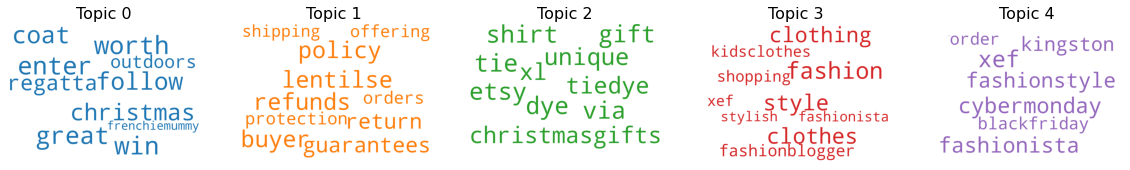

In [179]:
fig, axes = plt.subplots(1, 5, figsize=(20,30), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
    plt.savefig('../img/second_cloud.jpg')

In [357]:
# Create training corpus. Must be a sequence of sentences (e.g. an iterable or a generator).
sentences = Text8Corpus(texts)

In [358]:
# Each sentence must be a list of string tokens:
first_sentence = next(iter(texts))

In [359]:
print(first_sentence[:10])

['sweaters', 'sale', 'niarwiiyzy', 'fashion', 'style', 'love', 'instagood', 'like', 'photography']


In [360]:
phrase_model = Phrases(texts, min_count=1, threshold=1)

In [361]:
new_sentence = ['christmas', 'free', 'shipping']

In [362]:
phrase_model[new_sentence]

['christmas', 'free_shipping']

In [440]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(texts, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[texts], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

In [448]:
pd.options.display.max_colwidth = 100
